# IEEE-CIS Fraud Detection
## Can you detect fraud from customer transactions?
*Visit [kaggle](https://www.kaggle.com/c/ieee-fraud-detection) for competition details*

**Authored by Soyoung Kang**

## DataFrame explanations
- trns_train: whole dataframe
- trns_fraud: isFraud == 1
- trns_nonfraud: isFraud == 0

In [4]:
import pandas as pd
import pandas_profiling
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
trns_train = pd.read_csv('../ieee-fraud-detection/train_transaction.csv', engine = 'python')
trns_train.head(3)

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
trns_train.shape

(590540, 394)

In [7]:
trns_train.columns

Index(['TransactionID', 'isFraud', 'TransactionDT', 'TransactionAmt',
       'ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5',
       ...
       'V330', 'V331', 'V332', 'V333', 'V334', 'V335', 'V336', 'V337', 'V338',
       'V339'],
      dtype='object', length=394)

In [8]:
trns_train.isnull().sum()

TransactionID          0
isFraud                0
TransactionDT          0
TransactionAmt         0
ProductCD              0
                   ...  
V335              508189
V336              508189
V337              508189
V338              508189
V339              508189
Length: 394, dtype: int64

# 1. Categorical Variables

In [15]:
# Convert the datatype 'object' to 'category' for sake of speed

clst = list(trns_train.select_dtypes(include = 'object').columns)

for c in clst:
    trns_train[c] = trns_train[c].astype('category')

In [16]:
trns_train.select_dtypes(include = 'category').head(10)

,ProductCD,card4,card6,P_emaildomain,R_emaildomain,M1,M2,M3,M4,M5,M6,M7,M8,M9
0,W,discover,credit,NaN,NaN,T,T,T,M2,F,T,NaN,NaN,NaN
1,W,mastercard,credit,gmail.com,NaN,NaN,NaN,NaN,M0,T,T,NaN,NaN,NaN
2,W,visa,debit,outlook.com,NaN,T,T,T,M0,F,F,F,F,F
3,W,mastercard,debit,yahoo.com,NaN,NaN,NaN,NaN,M0,T,F,NaN,NaN,NaN
4,H,mastercard,credit,gmail.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,W,visa,debit,gmail.com,NaN,T,T,T,M1,F,T,NaN,NaN,NaN
6,W,visa,debit,yahoo.com,NaN,T,T,T,M0,F,F,T,T,T
7,W,visa,debit,mail.com,NaN,NaN,NaN,NaN,M0,F,F,NaN,NaN,NaN
8,H,visa,debit,anonymous.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,W,mastercard,debit,yahoo.com,NaN,T,T,T,M0,T,T,NaN,NaN,NaN


In [17]:
trns_fraud = trns_train[trns_train.isFraud == 1]
trns_nonfraud = trns_train[trns_train.isFraud == 0]

## Checking null values on categorical variables

In [18]:
trns_train.select_dtypes('category').isnull().sum()

ProductCD             0
card4              1577
card6              1571
P_emaildomain     94456
R_emaildomain    453249
M1               271100
M2               271100
M3               271100
M4               281444
M5               350482
M6               169360
M7               346265
M8               346252
M9               346252
dtype: int64

## Overall description on categorical variables

### Whole data

In [19]:
trns_train.describe(include=['category'])

,ProductCD,card4,card6,P_emaildomain,R_emaildomain,M1,M2,M3,M4,M5,M6,M7,M8,M9
count,590540,588963,588969,496084,137291,319440,319440,319440,309096,240058,421180,244275,244288,244288
unique,5,4,4,59,60,2,2,2,3,2,2,2,2,2
top,W,visa,debit,gmail.com,gmail.com,T,T,T,M0,F,F,F,F,T
freq,439670,384767,439938,228355,57147,319415,285468,251731,196405,132491,227856,211374,155251,205656


### Fraud data

In [20]:
trns_fraud.describe(include=['category'])

,ProductCD,card4,card6,P_emaildomain,R_emaildomain,M1,M2,M3,M4,M5,M6,M7,M8,M9
count,20663,20622,20624,17873,11227,6342,6342,6342,15436,7569,8692,4817,4817,4817
unique,5,4,2,42,32,1,2,2,3,2,2,2,2,2
top,W,visa,debit,gmail.com,gmail.com,T,T,T,M0,T,F,F,F,T
freq,8969,13373,10674,9943,6811,6342,5158,4293,7198,4055,5397,4089,3373,3658


### NonFraud data

In [21]:
trns_nonfraud.describe(include=['category'])

,ProductCD,card4,card6,P_emaildomain,R_emaildomain,M1,M2,M3,M4,M5,M6,M7,M8,M9
count,569877,568341,568345,478211,126064,313098,313098,313098,293660,232489,412488,239458,239471,239471
unique,5,4,4,59,60,2,2,2,3,2,2,2,2,2
top,W,visa,debit,gmail.com,gmail.com,T,T,T,M0,F,F,F,F,T
freq,430701,371394,429264,218412,50336,313073,280310,247438,189207,128977,222459,207285,151878,201998


## A. card1 (card id?)

### Categories

In [22]:
trns_train.card1.unique()

array([13926,  2755,  4663, ..., 13166,  8767, 18038])

## B. card2 (issue bank?)

### Categories

In [44]:
trns_train.card2.unique()

array([ nan, 404., 490., 567., 514., 555., 360., 100., 111., 352., 375.,
       418., 303., 314., 543., 583., 148., 321., 269., 361., 272., 399.,
       569., 453., 417., 512., 545., 266., 114., 481., 452., 547., 383.,
       170., 343., 556., 285., 562., 302., 264., 558., 500., 396., 103.,
       206., 143., 243., 476., 199., 174., 423., 446., 492., 523., 440.,
       528., 161., 535., 354., 117., 455., 325., 158., 268., 122., 479.,
       147., 215., 480., 265., 388., 408., 309., 415., 414., 437., 104.,
       225., 101., 134., 586., 191., 491., 369., 322., 494., 532., 313.,
       474., 324., 475., 298., 429., 432., 553., 566., 599., 296., 251.,
       310., 242., 204., 250., 270., 346., 316., 194., 587., 390., 135.,
       536., 254., 226., 327., 420., 260., 413., 428., 561., 387., 411.,
       392., 203., 297., 136., 276., 142., 527., 210., 184., 459., 118.,
       585., 106., 588., 449., 176., 177., 246., 439., 503., 445., 172.,
       468., 239., 496., 364., 533., 370., 578., 15

## C. card4 (card type)

### Categories

In [23]:
trns_train.card4.unique()

[discover, mastercard, visa, american express, NaN]
Categories (4, object): [discover, mastercard, visa, american express]

### NaN values

In [24]:
trns_train[trns_train['card4'].isnull() == True].head(10)

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
9686,2996686,0,283553,40.0,H,16794,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11400,2998400,0,336773,50.0,H,12629,NaN,146.0,NaN,224.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11403,2998403,0,336812,50.0,H,3475,555.0,150.0,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28994,3015994,1,744757,40.0,W,5178,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29013,3016013,1,744980,49.0,W,5178,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48247,3035247,0,1137148,25.0,H,10170,555.0,150.0,NaN,206.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99085,3086085,0,1991598,100.0,H,11064,555.0,200.0,NaN,226.0,...,0.0,100.0,100.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0
113753,3100753,0,2218177,50.0,H,6512,555.0,149.0,NaN,224.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
195706,3182706,1,4401965,250.0,R,16032,138.0,200.0,NaN,226.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
235075,3222075,0,5573808,50.0,H,17329,555.0,200.0,NaN,226.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Correlation with isFraud

In [25]:
# Dummify card4

trns_dum = pd.get_dummies(data = trns_train, dummy_na = True)

In [26]:
trns_dum.filter(regex = '^card4_', axis = 1).corrwith(trns_dum['isFraud'])

card4_american express   -0.004095
card4_discover            0.024564
card4_mastercard         -0.002463
card4_visa               -0.001741
card4_nan                -0.002532
dtype: float64

## D. card5 (country?)

### Categories

In [27]:
np.sort(trns_train.card5.unique())

array([100., 101., 102., 104., 105., 106., 107., 109., 111., 112., 113.,
       114., 115., 116., 117., 118., 119., 120., 121., 122., 123., 125.,
       126., 127., 128., 129., 130., 131., 132., 133., 134., 135., 136.,
       137., 138., 139., 140., 141., 142., 143., 144., 145., 146., 147.,
       148., 149., 150., 151., 152., 156., 157., 158., 159., 160., 162.,
       163., 164., 165., 166., 167., 168., 169., 171., 172., 173., 175.,
       177., 178., 180., 181., 182., 183., 184., 185., 187., 188., 189.,
       190., 191., 194., 195., 196., 197., 198., 199., 200., 201., 202.,
       203., 204., 205., 206., 207., 209., 210., 211., 212., 213., 214.,
       215., 216., 217., 219., 221., 222., 223., 224., 225., 226., 228.,
       229., 230., 231., 232., 233., 234., 235., 236., 237.,  nan])

### NaN values

In [28]:
trns_train[trns_train['card5'].isnull() == True].head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
798,2987798,0,102655,108.500,W,17262,578.0,150.0,mastercard,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2540,2989540,0,147016,75.000,S,1357,555.0,150.0,american express,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2635,2989635,1,148007,30.029,C,12616,490.0,150.0,visa,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2703,2989703,0,148637,100.000,R,9417,NaN,150.0,american express,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2892,2989892,0,150532,103.802,C,12616,490.0,150.0,visa,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Number of fraud transactions and total TransactionAmt per category

In [29]:
trns_train.groupby(['card5'])['isFraud', 'TransactionAmt'].sum().sort_values(by = 'isFraud', ascending = False).head(20)

,isFraud,TransactionAmt
card5,,
226.0,8753,4.184337e+07
224.0,3152,9.152374e+06
102.0,1832,6.235319e+06
137.0,1725,8.460349e+05
138.0,1682,8.152767e+05
195.0,681,3.840507e+06
166.0,630,5.590878e+06
219.0,571,1.992251e+06
117.0,354,3.245045e+06


## C. ProductCD (Product code)

### Number of fraud transactions and total TransactionAmt per category

In [30]:
trns_train.groupby('ProductCD')['isFraud', 'TransactionAmt'].count()

,isFraud,TransactionAmt
ProductCD,,
C,68519,68519
H,33024,33024
R,37699,37699
S,11628,11628
W,439670,439670


# 2. Numerical Variables

## Overall description on numerical variables

### Fraud data

In [31]:
trns_fraud.drop('TransactionID', axis = 1).describe(exclude=['category'])

,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,dist1,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
count,20663.0,2.066300e+04,20663.000000,20663.000000,20240.000000,20624.000000,20453.000000,12922.000000,12922.000000,4755.000000,...,3686.000000,3686.000000,3686.000000,3686.000000,3686.000000,3686.000000,3686.000000,3686.000000,3686.000000,3686.000000
mean,1.0,7.690033e+06,149.244779,9547.654164,365.370850,162.368648,191.994328,294.317134,86.286024,174.588854,...,0.313619,90.384699,164.859468,127.633749,9.299240,49.394466,25.483993,37.742268,53.242268,45.496473
std,0.0,4.416551e+06,232.212163,4762.051380,159.623511,17.495775,45.779886,103.584955,4.936238,424.232313,...,0.960475,227.643019,436.287131,339.856944,51.502023,201.848261,117.938993,142.505208,190.250383,175.966280
min,1.0,8.976000e+04,0.292000,1015.000000,100.000000,100.000000,100.000000,110.000000,10.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.0,3.965858e+06,35.044000,5732.500000,204.000000,150.000000,138.000000,204.000000,87.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.0,7.575230e+06,75.000000,9633.000000,375.000000,150.000000,224.000000,299.000000,87.000000,10.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.0,1.121743e+07,161.000000,13623.000000,514.000000,185.000000,226.000000,330.000000,87.000000,85.500000,...,0.000000,75.000000,150.000000,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.0,1.581088e+07,5191.000000,18375.000000,600.000000,231.000000,237.000000,536.000000,96.000000,4942.000000,...,13.000000,2600.000000,4700.000000,4285.000000,635.000000,2430.000000,1605.000000,2200.000000,2400.000000,2400.000000


### NonFraud data

In [32]:
trns_nonfraud.drop('TransactionID', axis = 1).describe(exclude=['category'])

,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,dist1,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
count,569877.0,5.698770e+05,569877.000000,569877.000000,561367.000000,568351.000000,565828.000000,511912.000000,511912.000000,233514.000000,...,78665.000000,78665.000000,78665.000000,78665.000000,78665.000000,78665.000000,78665.000000,78665.000000,78665.000000,78665.000000
mean,0.0,7.360791e+06,134.511665,9911.464381,362.453981,152.862034,199.542212,290.643341,86.813620,117.360098,...,0.797534,751.325339,1432.523827,1056.184360,9.830808,59.622346,28.673672,56.177580,155.748691,103.287590
std,0.0,4.623930e+06,239.395078,4905.672370,157.726065,10.904432,41.046975,101.692564,2.607742,370.641879,...,4.831921,6359.489982,11424.424611,8137.291377,249.260209,394.187771,279.773375,683.262438,1119.429005,832.861349
min,0.0,8.640000e+04,0.251000,1000.000000,100.000000,100.000000,100.000000,100.000000,13.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,3.010651e+06,43.970000,6019.000000,215.000000,150.000000,166.000000,204.000000,87.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.0,7.271678e+06,68.500000,9711.000000,361.000000,150.000000,226.000000,299.000000,87.000000,8.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.0,1.125334e+07,120.000000,14229.000000,512.000000,150.000000,226.000000,330.000000,87.000000,24.000000,...,0.000000,0.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,0.0,1.581113e+07,31937.391000,18396.000000,600.000000,231.000000,237.000000,540.000000,102.000000,10286.000000,...,55.000000,160000.000000,160000.000000,160000.000000,55125.000000,55125.000000,55125.000000,104060.000000,104060.000000,104060.000000


## Correlations btw numerical variables

### Fraud data

In [33]:
trns_fraud.select_dtypes(exclude = 'category').drop('TransactionID', axis = 1).corr()

,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,dist1,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
isFraud,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TransactionDT,NaN,1.000000,0.039755,0.035200,-0.013747,0.014511,0.014398,0.077384,0.135555,-0.026821,...,0.034787,-0.014534,0.010519,-0.031806,-0.041794,0.032657,-0.036657,-0.023621,-0.014515,-0.034420
TransactionAmt,NaN,0.039755,1.000000,0.018249,0.076691,-0.306987,0.048047,-0.038431,0.082265,0.023474,...,-0.097557,0.129614,0.033666,0.063100,0.034564,-0.063769,-0.034298,0.063186,0.057591,0.042524
card1,NaN,0.035200,0.018249,1.000000,-0.000138,-0.060676,-0.057372,0.011375,0.026995,0.049152,...,-0.042445,-0.024851,-0.026933,-0.018651,-0.028400,-0.026358,-0.030413,-0.034822,-0.027412,-0.025374
card2,NaN,-0.013747,0.076691,-0.000138,1.000000,-0.115585,0.149751,0.114190,-0.028506,-0.059750,...,-0.040530,-0.018379,-0.028561,-0.021563,-0.034003,-0.058944,-0.046267,-0.010192,-0.004344,-0.008468
card3,NaN,0.014511,-0.306987,-0.060676,-0.115585,1.000000,-0.269582,-0.024789,-0.513432,-0.015791,...,0.023639,0.004534,0.005305,0.002613,0.004205,0.014586,0.005956,0.040081,0.024368,0.032142
card5,NaN,0.014398,0.048047,-0.057372,0.149751,-0.269582,1.000000,0.095865,0.062862,-0.021050,...,0.018034,-0.023954,-0.125546,-0.096996,-0.027750,-0.134821,-0.091598,0.041105,-0.023921,0.007785
addr1,NaN,0.077384,-0.038431,0.011375,0.114190,-0.024789,0.095865,1.000000,0.023200,-0.030226,...,0.025384,-0.008227,-0.040439,-0.025806,-0.064838,-0.128620,-0.119988,-0.005272,0.024976,0.014890
addr2,NaN,0.135555,0.082265,0.026995,-0.028506,-0.513432,0.062862,0.023200,1.000000,NaN,...,-0.032197,-0.005747,0.009036,0.002547,0.017435,0.020864,0.018954,-0.015355,-0.005084,-0.009134
dist1,NaN,-0.026821,0.023474,0.049152,-0.059750,-0.015791,-0.021050,-0.030226,NaN,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### NonFraud data

In [34]:
trns_nonfraud.select_dtypes(exclude = 'category').drop('TransactionID', axis = 1).corr()

,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,dist1,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
isFraud,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TransactionDT,NaN,1.000000,0.010833,0.009985,-0.019446,-0.015086,-0.025175,-0.001982,0.048875,-0.027445,...,0.266311,0.212309,0.233523,0.238528,0.006307,0.189524,0.109512,0.078399,0.216972,0.173100
TransactionAmt,NaN,0.010833,1.000000,-0.006384,0.013940,-0.102702,0.001684,-0.006782,0.027018,0.025232,...,0.007553,0.027501,0.013782,0.020631,0.081755,0.049508,0.075022,0.134861,0.087135,0.111650
card1,NaN,0.009985,-0.006384,1.000000,0.005196,0.008900,-0.095630,0.020641,-0.001571,0.004130,...,0.149905,0.124087,0.135715,0.139176,-0.001688,0.083488,0.052496,0.037119,0.121464,0.093366
card2,NaN,-0.019446,0.013940,0.005196,1.000000,0.031866,0.025774,0.028108,-0.021703,-0.012768,...,0.075925,0.057201,0.062591,0.064299,0.005226,0.046679,0.031564,0.018203,0.056848,0.044315
card3,NaN,-0.015086,-0.102702,0.008900,0.031866,1.000000,-0.148360,0.002413,-0.575083,-0.012453,...,0.001418,0.001101,0.001327,0.001270,-0.001052,-0.000439,-0.001806,0.000473,0.001493,0.001044
card5,NaN,-0.025175,0.001684,-0.095630,0.025774,-0.148360,1.000000,0.033366,0.034555,0.009245,...,-0.297286,-0.243569,-0.265774,-0.272866,-0.029051,-0.213125,-0.141833,-0.078873,-0.239490,-0.187854
addr1,NaN,-0.001982,-0.006782,0.020641,0.028108,0.002413,0.033366,1.000000,-0.003875,-0.000744,...,0.043461,0.036671,0.039921,0.040940,0.004907,0.033774,0.022236,0.011613,0.035512,0.027459
addr2,NaN,0.048875,0.027018,-0.001571,-0.021703,-0.575083,0.034555,-0.003875,1.000000,-0.039220,...,0.003390,0.003675,0.003921,0.004050,0.002182,0.005477,0.004158,0.001828,0.003895,0.003295
dist1,NaN,-0.027445,0.025232,0.004130,-0.012768,-0.012453,0.009245,-0.000744,-0.039220,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Correlations btw C's

In [35]:
trns_train.select_dtypes(exclude = 'category')[['isFraud', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14']].corr()

,isFraud,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14
isFraud,1.000000,0.030570,0.037229,-0.006833,0.030382,-0.030754,0.020909,0.028160,0.032139,-0.031703,0.028396,0.027484,0.031905,-0.011146,0.007921
C1,0.030570,1.000000,0.995089,-0.003467,0.967800,0.165862,0.982238,0.926258,0.967746,0.175999,0.958202,0.996515,0.927939,0.774603,0.951761
C2,0.037229,0.995089,1.000000,-0.003339,0.972134,0.126540,0.974845,0.938867,0.975863,0.133566,0.970624,0.993898,0.940258,0.751221,0.936148
C3,-0.006833,-0.003467,-0.003339,1.000000,-0.001720,-0.008101,-0.004711,-0.001730,-0.001203,-0.010074,-0.001494,-0.003583,-0.001763,-0.007747,-0.005091
C4,0.030382,0.967800,0.972134,-0.001720,1.000000,-0.012842,0.962319,0.895092,0.959995,-0.015970,0.952466,0.974547,0.894619,0.644549,0.907676
C5,-0.030754,0.165862,0.126540,-0.008101,-0.012842,1.000000,0.232409,-0.009970,-0.011654,0.925786,-0.011846,0.168862,-0.009875,0.717509,0.378950
C6,0.020909,0.982238,0.974845,-0.004711,0.962319,0.232409,1.000000,0.858583,0.921972,0.250695,0.914440,0.991105,0.858182,0.808531,0.984201
C7,0.028160,0.926258,0.938867,-0.001730,0.895092,-0.009970,0.858583,1.000000,0.982983,-0.012399,0.985062,0.915209,0.999489,0.632394,0.794701
C8,0.032139,0.967746,0.975863,-0.001203,0.959995,-0.011654,0.921972,0.982983,1.000000,-0.014492,0.996970,0.962722,0.983027,0.653245,0.860246
C9,-0.031703,0.175999,0.133566,-0.010074,-0.015970,0.925786,0.250695,-0.012399,-0.014492,1.000000,-0.014731,0.182446,-0.012212,0.704056,0.397396


## A. TransactionAmt

### Total dataframe's distribution of TransactionAmt

In [36]:
#trns_train.TransactionAmt.sum()
trns_train.TransactionAmt.describe()

count    590540.000000
mean        135.027176
std         239.162522
min           0.251000
25%          43.321000
50%          68.769000
75%         125.000000
max       31937.391000
Name: TransactionAmt, dtype: float64

### Fraud dataframe's distribution of TransactionAmt

In [37]:
#trns_fraud.TransactionAmt.sum()
trns_fraud.TransactionAmt.describe()

count    20663.000000
mean       149.244779
std        232.212163
min          0.292000
25%         35.044000
50%         75.000000
75%        161.000000
max       5191.000000
Name: TransactionAmt, dtype: float64

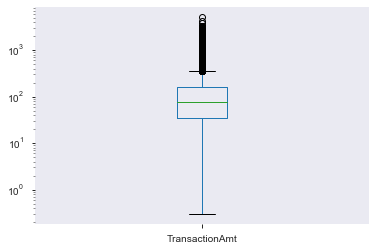

In [38]:
fig, ax = plt.subplots()
ax.set_yscale('log')
trns_fraud.boxplot(column = 'TransactionAmt', grid = False, ax = ax)

### NonFraud dataframe's distribution of TransactionAmt
- Seems to be similar to that of total dataframe

In [39]:
#trns_nonfraud.TransactionAmt.sum()
trns_nonfraud.TransactionAmt.describe()

count    569877.000000
mean        134.511665
std         239.395078
min           0.251000
25%          43.970000
50%          68.500000
75%         120.000000
max       31937.391000
Name: TransactionAmt, dtype: float64

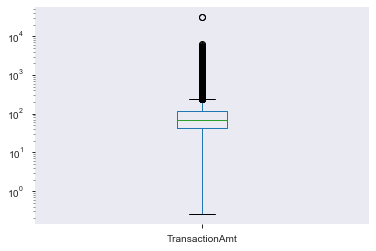

In [40]:
fig, ax = plt.subplots()
ax.set_yscale('log')
trns_nonfraud.boxplot(column = 'TransactionAmt', grid = False, ax = ax)